# Estimate Pi

Given *n* random samples from a uniform distribution, the goal is to approximate Pi as well as possible.

Rules:
 * No functions other than elementary operations (`+`, `-`, `*`, `/`, `**`, `sqrt`, `<`, `>`, `==`)
 * No numpy
 * No direct computation of pi, or constants that produce pi
 * for loops are allowed
 * Can use `.mean()` to compute an average
 * Can use `.float()` to cast to float (if `<`, `>` or `==` are used)

In [ ]:
import torch

def estimate_pi_over_4(n):
    """
    Not a very good estimate but eh

    Inputs:
        n (int) number of samples to use. You are guaranteed that n>0 and even.

    Returns:
        (float) pi/4 approximation (ideally 0.78539816339).
    """
    # Ranges from [0, 1].
    x_samples = torch.rand(n//2)
    y_samples = torch.rand(n//2)
    num_in_circle = 0
    # 0.5 in expectation.
    for i in range(n//2):
        x = x_samples[i]
        y = y_samples[i]
        dist = (x ** 2 + y ** 2) ** 0.5
        if dist <= 1:
            num_in_circle += 1

    return num_in_circle / (n/2)

estimate_pi_over_4(1000)

0.772

### Evaluation

The estimation function will be evaluated on squared error from the actual value of pi.  
We will run your code for varying values of *n*,
to see how the approximation (hopefully) gets better as _n_ grows.
**Do not modify the code below.**

In [ ]:
M_REPETITIONS = 1000


def squared_error(pi_func, n_samples):
    """
    Averages estimate of pi over M_REPETITIONS and computes the squared error from pi.

    Inputs:
        pi_func (function) given n_samples, returns approximation of pi.
        n_samples (int) number of samples to draw from a uniform distribution.

    Returns:
        (float) mean absolute error.
    """
    from numpy import mean, pi

    return mean([abs(pi/4 - pi_func(n_samples)) for _ in range(M_REPETITIONS)])


def evaluate(pi_func, plot=True):
    import numpy as np
    import matplotlib.pyplot as plt

    ns = (torch.logspace(0, 3, 15)+0.99).int()*2
    errors = [squared_error(pi_func, n) for n in ns]

    if plot:
        plt.title('Error: %.4f %s' % (np.mean(errors), pi_func))
        plt.gca().set_ylabel('Estimation Error')
        plt.gca().set_xlabel('n Samples (log)')
        plt.gca().set_xscale('log')
        plt.plot(ns, errors, 'o--')
        plt.show()

    # A good solution should obtain about 0.1 error,
    # a great solution can reach 0.025 error
    return errors

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


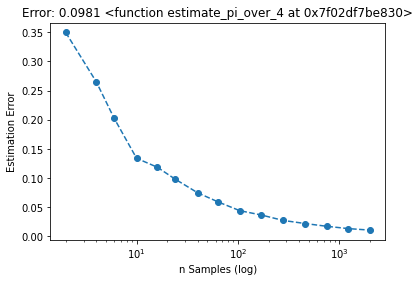

[0.34988055,
 0.26534954,
 0.20274924,
 0.133854,
 0.11850221,
 0.09805017,
 0.074585415,
 0.058764927,
 0.04391373,
 0.036438312,
 0.02719536,
 0.021877656,
 0.017136041,
 0.013116914,
 0.010535202]

In [ ]:
# Let's test our solution here
evaluate(estimate_pi_over_4)